### Dirichlet Process Mixture Models (DPMMs):
- Dirichlet Process Mixture Models(DPMMs) is a flexible clustering Method that can automatically decide the number of clusters based on the data.
- Unlike the traditional methods like K-Means which require to specify the number of clusters.
- It offers a probabilistic and non-probabilistic approach to clustering which allows to the model to figure out number of groups on its own based complexity of the data.
### Concepts of DPMMs:
- To understand the DPMMs, it's important to undertand two key concepts:
####  1. Beta Distribution:
- The Beta distribution models probabilities for two possible outcomes such as success or failure.
- It is defined by two parameters α and β that shape the distribution.
- The probability density function (PDF) is given by -
- f(x, α, β) = x^(α-1) (1-x)^(β-1) / B(αβ).
  - where B(α,β) is the beta function.
#### 2. Dirichlet distribution:
- The dirichlet distribution is a generalization of the Beta distribution for multiple outcomes.
- It represnts the probabilities of different categories like rolling a dice with unknown probabilities for each side.
- The PDF of the Dirichlet distribution is:
- f(p,α) = 1/B(α) Πp(i)^(α(i)-1)
  - where, p=(p1,p2,p3...pk) are the probabilities of K categories.
  - Each p(i) ≥ 0 and ∑ p(i) =1
  - α = (α1, α2, …, αk) are positive shape values.
  - B(α) is the beta function.
#### Effect of α:
- Higher α -> probabilities near the mean
- Equal α -> symmetric shape
- Different α -> skewed shape

### Dirichlet Process(DP):
- A Dirichlet process is a stochastic process that generates probility distribution over infinite categories.
- It enables clustering without specifying the number of clusters in advance.
- The Dirichlet process is DP(α, G0)
  - where, α - Concentartion parameter controlling cluster diversity.
  - G0 - base distribution representing the prior belief about cluster parameters.
### Stick-Breaking Process:
- The stick-breaking process is a method to get probabilities from a diirichlet process.
- Steps -
  1. Start with a stick length 1.
  2. Break the first piece using Beta(1,α)-> gives p1.
  3. Break the next piece with remaining stick -> gives p2.
  4. Keep repeating p3,p4, and so on. The pieces will add up close to 1.
- Mathematically this can be expressed as -
  - p1 =  β(1,α)
  - p2 =  β(1,α)*(1-p1)
  - p3 =  β(1,α)*(1-p1-p2)

### DPMMs working:
- DPMM is an extension of gaussian Mixture Models where the number of clusters is not fixed.
- It uses the Dirichet process as a prior for the mixture components.
#### Steps in the process:
1. Initialize: Assign random clusters to data points.
2. Iterate for Each Data Point:
   1. Pick one point.
   2. Keep all other assignments fixed.
   3. Compute the probability of placing this point in: an existing cluster or a new cluster.
3. Update - Assign the point to whichever option has the higher probability.
4. Repeat - Continue until the cluster assignments stop changing.
#### Assignment Probabilities:
1. Assignment to an existing cluster k P(existing cluster k) = [n(k) / n-1+α] N(μ,1)
2. Assignment to a new cluster P(new cluster) = [ α/ n-1+α]N(0,1)
- where, n(k) - Number of points in cluster k.
- α - Concentration parameter.
- N(μ, σ) - Gaussian Distribution.

### Impelneting DPMM:
#### 1. Import Libraries and Load Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA

data = pd.read_csv('Mall_customers.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#### 2.Feature Selection:
- In this step we select features that are likely to influence customers clusters.


In [2]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

#### 3. Dimensionality Reduction:
- We will use PCA algorithm to reduce the data's dimensions to 2 for easy visualization.

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#### 4. Fit Bayesian Gaussian Mixture Model:
- The model automatically determines the optimal number of clusters based on the data. 

In [8]:
dpmm = BayesianGaussianMixture(
    n_components=10,
    covariance_type='full',
    weight_concentration_prior_type = 'dirichlet_process',
    weight_concentration_prior = 1e-2,
    random_state=42
)

dpmm.fit(X)
labels = dpmm.predict(X)

C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### 5. Visualization:
- Clusters are visualized with different colors making patterns easier to interpret.

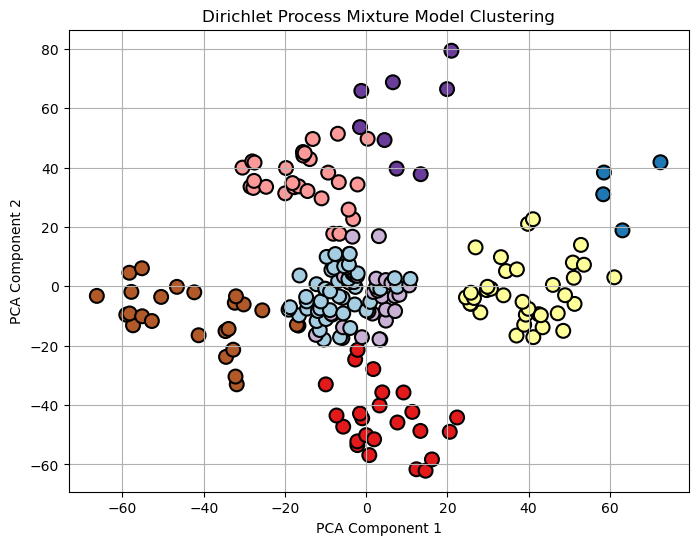

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap=plt.cm.Paired, edgecolor='k', s=100, linewidth=1.5)
plt.title('Dirichlet Process Mixture Model Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()